# Data Transformation

Data in different scales.

Values in a dataset might have a variety of different magnitudes, ranges, or scales.
Algorithms that use distance as a parameter may not weigh all these in the same way. 
There are various data transformation techniques that are used to transform the features of our data so that they use the same scale, magnitude, or range. 
This ensures that each feature has an appropriate effect on a model's predictions.
Some features in our data might have high-magnitude values (for example, annual salary), while others might have relatively low values (for example, the number of years worked at a company). Just because some data has smaller values does not mean it is less significant.

Reference: Data Science with Python
By Rohan Chopra, Aaron England, Mohamed Noordeen Alaudeen
July 2019

https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec08/data-in-different-scales

# Implementing Scaling Using the Standard Scaler Method

In [109]:
import pandas as pd

In [110]:
df = pd.read_csv('Wholesale customers data.csv')

In [111]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [112]:
dtypes = df.dtypes
dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Perform standard scaling and print the first five rows of the new dataset. To do so, use the StandardScaler() class from sklearn.preprocessing and implement the fit_transorm() method.
Using the StandardScaler method, we will scale the data into a uniform unit over all the columns. 
The values of all the features will be converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.

In [114]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale, columns=df.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Implementing Scaling Using the MinMax Scaler Method

Perform MinMax scaling and print the initial five values of the new dataset. To do so, use the MinMaxScaler() class from sklearn.preprocessing and implement the fit_transorm() method. Add the following code to implement this:
Using the MinMaxScaler method, we will scale the data into a uniform unit over all the columns

In [115]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale,columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


## Leche total

In [116]:
milk1 = 0
milk2 = 0
milk3 = 0

for index, row in df.iterrows():
    if row['Region'] == 1:
        milk1 += row['Milk']
    elif row['Region'] == 2:
        milk2 += row['Milk']
    elif row['Region'] == 3:
        milk3 += row['Milk']
        
print( 'Region 1: ', milk1, 'Region 2: ', milk2, 'Region 3: ', milk3)

Region 1:  422454 Region 2:  239144 Region 3:  1888759


## Total de Gasto de abarrotes

In [117]:
grocery1 = 0
grocery2 = 0

for index, row in df.iterrows():
    if row['Channel'] == 1:
        grocery1 += row['Grocery']
    elif row['Channel'] == 2:
        grocery2 += row['Grocery']
        
print( 'Channel 1: ', grocery1, 'Channel 2: ', grocery2)

Channel 1:  1180717 Channel 2:  2317845


## One Hot Encoding

In [118]:

data = {
    'Nombre': ['Ana', 'Luis', 'Sofía', 'Pedro', 'Elena'],
    'Ciudad': ['Monterrey', 'Guadalajara', 'CDMX', 'Monterrey', 'Guadalajara'],
    'Edad': [25, 30, 28, 35, 27]
}

data = pd.DataFrame(data)
data=data.astype({'Nombre':"string", 'Edad': 'int', 'Ciudad':"category"})
data = pd.get_dummies(data, columns=['Ciudad'])


hot_columns = data.columns[data.dtypes == 'bool']
data[hot_columns] = data[hot_columns].astype(int)

data

,Nombre,Edad,Ciudad_CDMX,Ciudad_Guadalajara,Ciudad_Monterrey
0,Ana,25,0,0,1
1,Luis,30,0,1,0
2,Sofía,28,1,0,0
3,Pedro,35,0,0,1
4,Elena,27,0,1,0


## K means

In [119]:
data = pd.read_excel('Course Evaluation (Responses).xlsx')

In [120]:
data

,Timestamp,Name of Student,Registration number,Describe the course contents and course design in terms of level of preparedness [Course contents],Describe the course contents and course design in terms of level of preparedness [Teacher preparedness],Describe the course contents and course design in terms of level of preparedness [Student engagement],Describe the course contents and course design in terms of level of preparedness [Course coverage],Describe the course contents and course design in terms of level of preparedness [Discussion and respond to questions],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at start of course],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at end of course],...,Skill and responsiveness of the instructor [Instructor was available and helpful],Skill and responsiveness of the instructor [Grading was prompt and had useful feedback],Course content [Learning objectives were clear],Course content [Course content was organized and well planned],Course content [Course workload was appropriate],Course content [Course organized to allow all students to participate fully],What aspects of this course were most useful or valuable?,How would you improve this course?,Describe the experience of engagement in the project assigned in this course,Name one skill or aspect that you gained after completing this course
0,2024-05-25 14:54:06.007,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,2024-05-25 14:56:59.385,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,2024-05-25 14:59:13.970,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,2024-05-25 15:07:56.230,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,2024-05-25 15:12:50.812,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning
5,2024-05-25 15:23:40.768,Syed Zille Abbas Kazmi,1006-FET-BSME-F-21,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,...,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral,Helped a lot in designing processes and critic...,By doing practical class activities,Learning experience beyond text book level ext...,"Product development cycle, Identifying the end..."
6,2024-05-25 19:58:43.462,Muhammad hunain,999-FET/BSME/F21,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,...,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree,

In [121]:
data.shape

(44, 26)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 26 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                                                         --------------  -----         
 0   Timestamp                                                                                                                                      43 non-null     datetime64[ns]
 1   Name of Student                                                                                                                                43 non-null     object        
 2   Registration number                                                                                                                            43 non-null     object        
 3

In [123]:
data = data.iloc[:-1]

In [124]:
data.shape

(43, 26)

In [125]:
data

,Timestamp,Name of Student,Registration number,Describe the course contents and course design in terms of level of preparedness [Course contents],Describe the course contents and course design in terms of level of preparedness [Teacher preparedness],Describe the course contents and course design in terms of level of preparedness [Student engagement],Describe the course contents and course design in terms of level of preparedness [Course coverage],Describe the course contents and course design in terms of level of preparedness [Discussion and respond to questions],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at start of course],How course helped in improving the level of learning in terms of learning outcomes [Level of skill/knowledge at end of course],...,Skill and responsiveness of the instructor [Instructor was available and helpful],Skill and responsiveness of the instructor [Grading was prompt and had useful feedback],Course content [Learning objectives were clear],Course content [Course content was organized and well planned],Course content [Course workload was appropriate],Course content [Course organized to allow all students to participate fully],What aspects of this course were most useful or valuable?,How would you improve this course?,Describe the experience of engagement in the project assigned in this course,Name one skill or aspect that you gained after completing this course
0,2024-05-25 14:54:06.007,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,2024-05-25 14:56:59.385,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,2024-05-25 14:59:13.970,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,2024-05-25 15:07:56.230,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,2024-05-25 15:12:50.812,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning
5,2024-05-25 15:23:40.768,Syed Zille Abbas Kazmi,1006-FET-BSME-F-21,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,...,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral,Helped a lot in designing processes and critic...,By doing practical class activities,Learning experience beyond text book level ext...,"Product development cycle, Identifying the end..."
6,2024-05-25 19:58:43.462,Muhammad hunain,999-FET/BSME/F21,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,...,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree,

In [126]:
# Assuming 'df' is your original DataFrame

# Make a copy of the original DataFrame
data = data.copy()

# List of new column titles
new_column_titles = [
    "Timestamp",
    "Name of Student",
    "Registration Number",
    "Course Content Preparedness",
    "Teacher Preparedness",
    "Student Engagement",
    "Course Coverage",
    "Discussion and Response",
    "Skill/Knowledge at Start",
    "Skill/Knowledge at End",
    "Skill/Knowledge Required",
    "Contribution to Skill/Knowledge",
    "Instructor Effectiveness",
    "Presentation Clarity",
    "Stimulation of Interest",
    "Effective Use of Time",
    "Instructor Availability",
    "Grading and Feedback",
    "Clarity of Learning Objectives",
    "Organization and Planning",
    "Appropriateness of Workload",
    "Student Participation",
    "Course Usefulness",
    "Course Improvement Suggestions",
    "Project Engagement Experience",
    "Skills or Aspects Gained"
]

# Ensure the number of columns in the copied DataFrame matches the new column titles
if len(data.columns) == len(new_column_titles):
    data.columns = new_column_titles
else:
    raise ValueError("The number of columns in the DataFrame does not match the number of provided titles.")

# Display the updated DataFrame
data


,Timestamp,Name of Student,Registration Number,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,...,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation,Course Usefulness,Course Improvement Suggestions,Project Engagement Experience,Skills or Aspects Gained
0,2024-05-25 14:54:06.007,Arhum Waseem,1024-BSME-FET/F-21,Very good,Very good,Satisfactory,Excellent,Excellent,Satisfactory,Very good,...,Neutral,Agree,Agree,Agree,Agree,Agree,Design For Maximum Output,By Providing Slides To Students,Learning experience beyond text book level ext...,Life long learning
1,2024-05-25 14:56:59.385,Saud Asif,990-FET/BSME/F21,Excellent,Excellent,Very good,Excellent,Excellent,Fair,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,"Brain Storming for solution of a problem, proj...",Introduce projects that connect students with ...,Learning experience beyond text book level ext...,Identifying the end users and Response gatheri...
2,2024-05-25 14:59:13.970,Muhammad Hammad Sohail,1012-FET/BSME/F21,Excellent,Very good,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,"We learn different skills like gantt chart, df...",One things i wanna improve in this course is i...,Learning experience beyond text book level ext...,"Product development cycle, Use of Modern tools..."
3,2024-05-25 15:07:56.230,Muhammad Amir Taj,997/F21/BSME,Excellent,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The course had well-defined objectives and goa...,I think the course was perfect.,Learning experience beyond text book level ext...,"Use of Modern tools in product development, Li..."
4,2024-05-25 15:12:50.812,M.Talha saoud,1002/bsme/f-21,Excellent,Excellent,Very good,Very good,Very good,Excellent,Excellent,...,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,This help me to improve my skills for a busine...,Please add some content related to entrepreneu...,Learning experience beyond text book level ext...,Life long learning
5,2024-05-25 15:23:40.768,Syed Zille Abbas Kazmi,1006-FET-BSME-F-21,Excellent,Excellent,Fair,Very good,Excellent,Satisfactory,Excellent,...,Strongly agree,Agree,Agree,Strongly agree,Neutral,Neutral,Helped a lot in designing processes and critic...,By doing practical class activities,Learning experience beyond text book level ext...,"Product development cycle, Identifying the end..."
6,2024-05-25 19:58:43.462,Muhammad hunain,999-FET/BSME/F21,Satisfactory,Satisfactory,Excellent,Excellent,Very good,Satisfactory,Excellent,...,Strongly agree,Agree,Neutral,Agree,Strongly agree,Agree,Teacher's teaching method was excellent and di...,By elaborating course content and doing more c...,Only involved primary level learning generally...,Identifying the end users and Response gatheri...
7,2024-05-25 20:15:07.240,Abubakkar,1068-BSME/FET/F21,Excellent,Excellent,Excellent,Excellent,Excellent,Very good,Excellent,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Being practical work,get proper time to this course,Learning experience beyond text book level ext...,"Product development cycle, Identifying the end..."
8,2024-05-26 14:12:44.944,Muhammad Awais,1071-BSME/FET/F21,Very good,Very good,Very good,Excellent,Excellent,Excellent,Excellent,...,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,To find out dialy life problem and solve it,If there we add more physical projects in this...,Learning experience beyond text book level ext...,Life long learning
9,2024-05-26 14:13:02.105,Sayyam Imtiaz,1021/FET/BSME/F-21,Very good,Excel

In [127]:
columns_to_remove_indices = [0, 1, 2] + list(range(data.shape[1] - 3, data.shape[1]))
data = data.drop(columns=data.columns[columns_to_remove_indices])

In [128]:
data = data.iloc[:, :-1]

In [ ]:

# Define custom mappings
custom_mappings = {
    "Course Content Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Teacher Preparedness": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Student Engagement": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Course Coverage": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Discussion and Response": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge at Start": {"Poor": 1, "Fair": 2, "Satisfactory": 3, "Very good": 4, "Excellent": 5},
    "Skill/Knowledge at End": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Skill/Knowledge Required": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Contribution to Skill/Knowledge": {"Fair": 1, "Satisfactory": 2, "Very good": 3, "Excellent": 4},
    "Instructor Effectiveness": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Presentation Clarity": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Stimulation of Interest": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Effective Use of Time": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Instructor Availability": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Grading and Feedback": {"Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
    "Clarity of Learning Objectives": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Organization and Planning": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Appropriateness of Workload": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
    "Student Participation": {"Strongly disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly agree": 5},
}

# Apply custom mappings
df_encoded = data.copy()
for column, mapping in custom_mappings.items():
    df_encoded[column] = df_encoded[column].map(mapping)

# Display the encoded DataFrame
print("Encoded DataFrame:")
df_encoded

Encoded DataFrame:


,Course Content Preparedness,Teacher Preparedness,Student Engagement,Course Coverage,Discussion and Response,Skill/Knowledge at Start,Skill/Knowledge at End,Skill/Knowledge Required,Contribution to Skill/Knowledge,Instructor Effectiveness,Presentation Clarity,Stimulation of Interest,Effective Use of Time,Instructor Availability,Grading and Feedback,Clarity of Learning Objectives,Organization and Planning,Appropriateness of Workload,Student Participation
0,3,3,2,4,4,3,3,3,3,3,3,3,3,3,3,4,4,4,4
1,4,4,3,4,4,2,4,3,3,4,4,3,4,5,4,5,4,4,5
2,4,3,4,4,4,4,4,4,4,3,4,4,4,5,4,5,5,5,5
3,4,4,3,4,4,5,4,4,4,4,4,4,4,5,4,5,5,5,5
4,4,4,3,3,3,5,4,4,4,4,4,4,4,5,4,1,1,1,1
5,4,4,1,3,4,3,4,2,4,4,4,3,4,5,3,4,5,3,3
6,2,2,4,4,3,3,4,3,4,4,3,4,3,5,3,3,4,5,4
7,4,4,4,4,4,4,4,3,4,4,4,4,4,5,4,5,5,5,5
8,3,3,3,4,4,5,4,3,4,4,3,4,4,5,4,4,4,5,5
9,3,4,3,4,3,2,3,3,2,4,4,3,4,4,2,4,5,3,4


c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

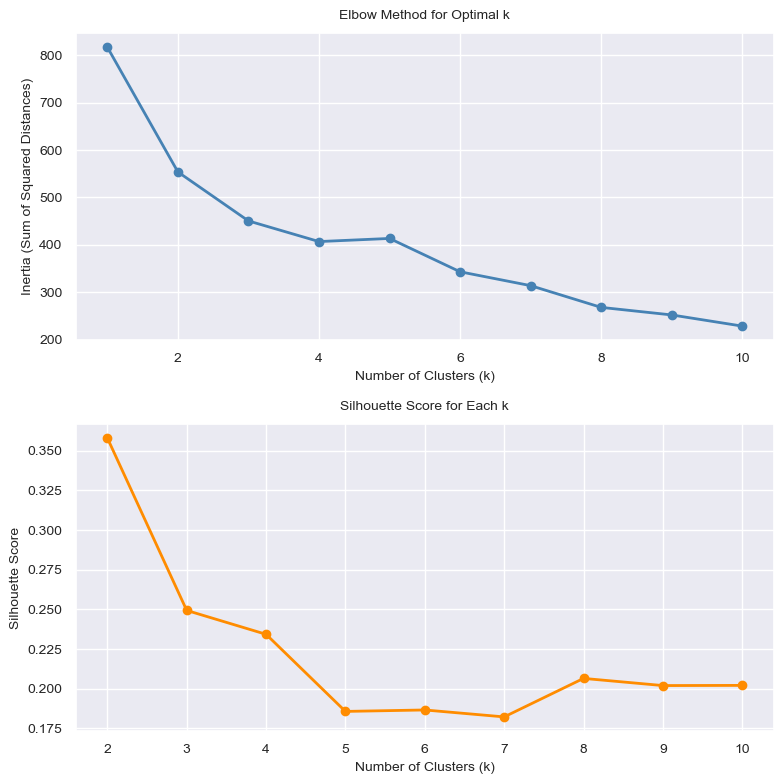

In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Use the elbow method and calculate Silhouette Score for each k
inertia = []
sil_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    # Only calculate silhouette score for k >= 2
    if k > 1:
        sil_score = silhouette_score(df_scaled, kmeans.labels_)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(None)

# Apply minimalist styling with a clean grid
sns.set(style="darkgrid")  # Use Seaborn's darkgrid theme for a professional look
plt.figure(figsize=(8, 8))  # Set figure size

# Elbow Curve (Inertia)
plt.subplot(2, 1, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color='steelblue', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k', fontsize=10, pad=10)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Silhouette Score
plt.subplot(2, 1, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o', linestyle='-', color='darkorange', linewidth=2, markersize=6)
plt.title('Silhouette Score for Each k', fontsize=10, pad=10)
plt.xlabel('Number of Clusters (k)', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Se puede observar que el punto codo es en 3, por lo que el numero optimo de clusters es 3.

c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


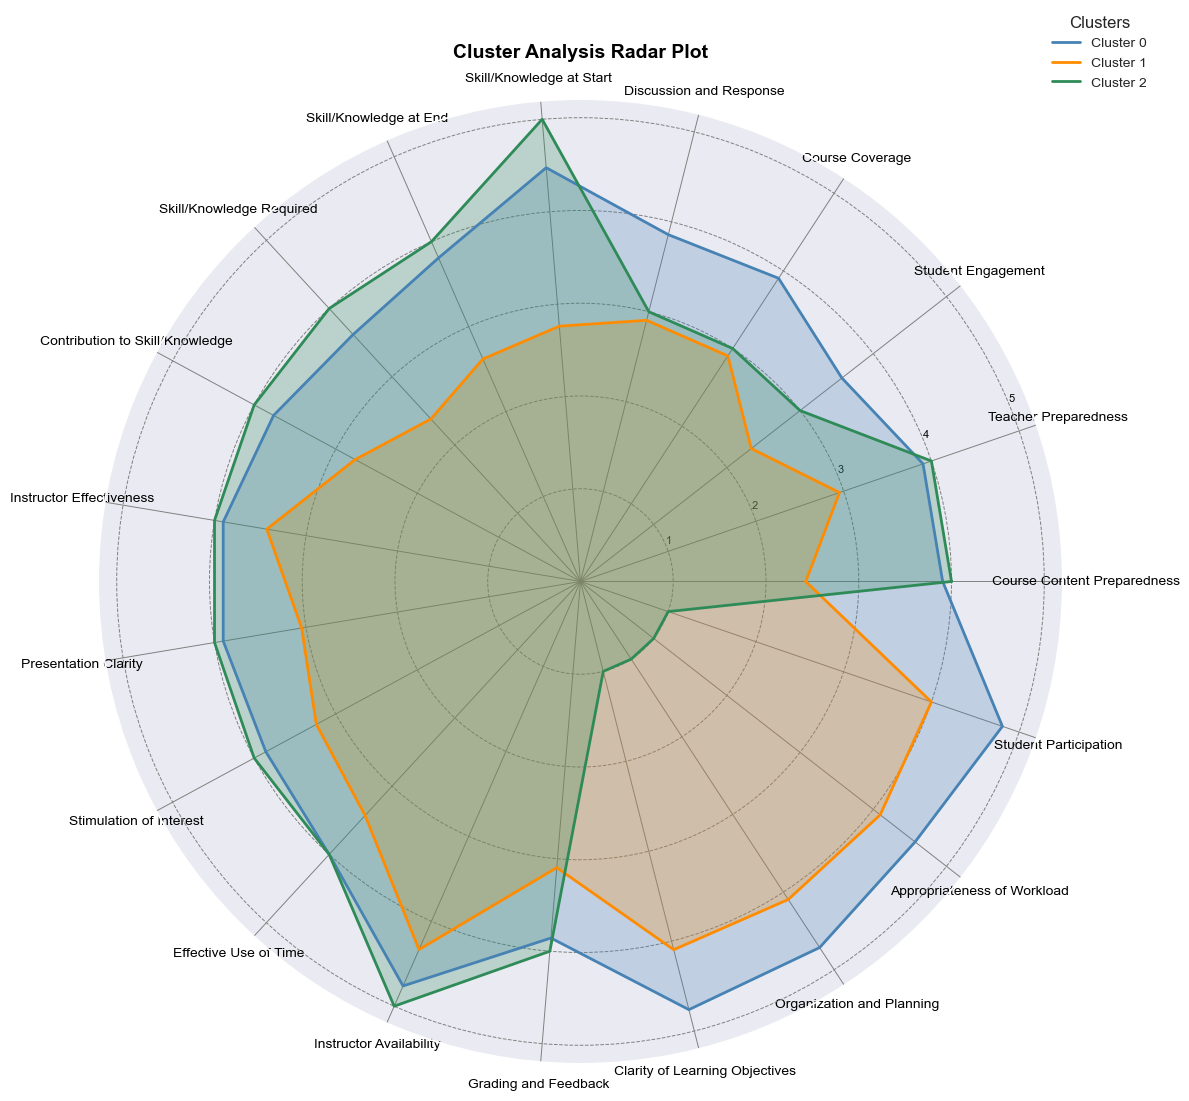

In [132]:


# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply k-means clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze each cluster by feature averages
cluster_averages = df_encoded.groupby('Cluster').mean()

# Define the features for the radar plot
features = cluster_averages.columns.tolist()
num_features = len(features)

# Add the first feature to the end to close the radar plot
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

# Minimalist styling for the radar plot with polar lines
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))  # Set a square figure size

# Plot each cluster with polar lines
colors = ['steelblue', 'darkorange', 'seagreen']  # Colors for clusters
for cluster in range(cluster_averages.shape[0]):
    values = cluster_averages.iloc[cluster].tolist()
    values += values[:1]  # Close the polygon
    ax.plot(angles, values, label=f'Cluster {cluster}', linewidth=2, color=colors[cluster], linestyle='solid')
    ax.fill(angles, values, alpha=0.25, color=colors[cluster])  # Use slight transparency for the fill

# Add labels for the features
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10, color='black')  # Use clean, readable labels

# Customize gridlines and add polar lines
ax.tick_params(axis='y', labelsize=8, colors='black')  # Adjust radial tick labels
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')  # Circular gridlines
ax.xaxis.grid(True, linestyle='-', linewidth=0.7, color='gray')  # Polar (radial) gridlines

# Add title and legend
plt.title('Cluster Analysis Radar Plot', size=14, pad=30, color='black', fontweight='bold')  # Title styling
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10, frameon=False, title='Clusters')

# Adjust layout and display
plt.tight_layout()
plt.show()


Se puede observar que hay 3 diferentes tipos de clusters identificados por el algoritmo, uno donde se califico de manera alta todas las metricas establecidas por el estudio (grupo azul), otro donde se califico de manera moderada todas las metricas del estudio (grupo naranja), y uno donde se le califico de manera alta a todas las metricas del estudio excepto organization and planning, clarity of learning objectives, appropriateness of workload y student participation (grupo verde). Todo este analisis puede ser util por el hecho de que asi se pueden identificar areas de desarrollo para ciertos grupos, al igual que se puede ver en general que areas de mejora puede haber para todos. 